# Lab_Hypothesis Testing

#### Instructions

1.It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. In the Honolulu Heart Study, a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

Set up the hypothesis test.
Write down all the steps followed for setting up the test.
Calculate the test statistic by hand and also code it in Python. It should be 4.76190. What decision can you make based on this calculated value?

#### Answer

The null Hypothesis H0: μ = 120 mm Hg
The alternative Hypothesis: μ ≠  120 mm Hg

We don't have the standard deviation from the population, so we do a t-student test.
We have a sample of 100 subjects.
Because we are looking for values that are less or higher than 120 mm Hg, we do a two tail test.

The critical value for a two tail test with 95% confidence interval and a degree of freedom with 99 is 1.984.
tc = 1.984

Calculation by hand:
test statistics = (mean of the sample - mean of the population)/(standard deviation of the sample/√size of the sample)
ts = (130.1-120)/ (21.21/√100) = 4,76190476

Now, tc = 1.984 < 4,7619 = t.

That means the value 4,7619 falls into the rejection region.

We reject the null hypothesis that the mean of the population is 120 mm Hg, because the sample we looked at has a
value outside of the confidence interval.
So, we accept the alternative Hypothesis.

#### Calucaltion with Python code

Critical value to the 0.95 confidence interval of a t-student distribution

In [4]:
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import numpy as np

In [18]:
tc = stats.t.ppf(1-(0.05/2), df=99)

In [17]:
tc

1.9842169515086827

test statistics 

In [23]:
(130.1-120)/(21.21/math.sqrt(100))

4.761904761904759

On Friday


In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will pack faster on the average than the machine currently used. To test that hypothesis, the times it takes each machine to pack ten cartons are recorded. The results, in seconds, are shown in the tables in the file Data/machine.txt. Assume that there is sufficient evidence to conduct the t test, does the data provide sufficient evidence to show if one machine is better than the other

H0: new_machine_mean_speed > old_machine_mean_speed
H1: new_machine_mean_speed <= old_machine_mean_speed

In [37]:
nm_sam = [42.1, 41, 41.3, 41.8, 42.4, 42.8, 43.2, 42.3, 41.8, 42.7]

In [38]:
om_sam = [42.7, 43.6, 43.8, 43.3, 42.5, 43.5, 43.1, 41.7, 44, 44.1]

Calculating the mean of the samples

In [39]:
mean_nm_sam = np.mean(nm_sam)

In [40]:
mean_nm_sam

42.14

In [41]:
mean_om_sam = np.mean(om_sam)

In [42]:
mean_om_sam

43.230000000000004

Calculating the standard deviation of the samples

In [43]:
std_nm_sam = np.std(nm_sam)

In [44]:
std_nm_sam

0.6483826030978941

In [45]:
std_om_sam = np.std(om_sam)

In [46]:
std_om_sam

0.7114070564732956

Computing the statistic

In [47]:
t = (mean_nm_sam - mean_om_sam)/ np.sqrt(((std_nm_sam**2)/10)+((std_om_sam**2)/10))

In [48]:
t

-3.5809955894645813

Computing the critical value

In [49]:
tc = stats.t.ppf(1-0.05, df=9)

In [50]:
tc

1.8331129326536335

Function for plotting the distribution

In [51]:
def visual_test(statistic, critical, dist = 'Norm', df = 0):

    mu = 0
    sigma = 1

    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    x0 = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

    if ( dist == 'Norm' ):
        plt.plot(x, stats.norm.pdf(x, mu, sigma))
        plt.fill_between(x0,stats.norm.pdf(x, mu, sigma),where = (x < -critical),facecolor='red')
        plt.fill_between(x0,stats.norm.pdf(x, mu, sigma),where = (x > critical),facecolor='red')
    else:
        if ( df == 0 ):
            while ( df == 0 or type(df) != int):
                try:
                    df = int(input("Set the correct value of degrees of freedom please: " )) 
                except:
                    df = 0       
        plt.plot(x, stats.t.pdf(x,df))
        plt.fill_between(x0,stats.t.pdf(x,df),where = (x < -critical),facecolor='red')
        plt.fill_between(x0,stats.t.pdf(x,df),where = (x > critical),facecolor='red')

    plt.axvline(-critical, c = 'r')
    plt.axvline(critical, c = 'r')
    plt.axvline(-statistic,c='b')
    plt.axvline(statistic,c='b')

    plt.show()

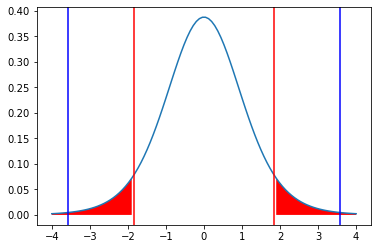

In [52]:
visual_test(t,tc,dist = 't', df=9)

The value is in the rejection zone. So we reject the hypothesis that the new machine is better than the old one and accept the alternative hypothesis.